In [1]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt

<IPython.core.display.Javascript object>


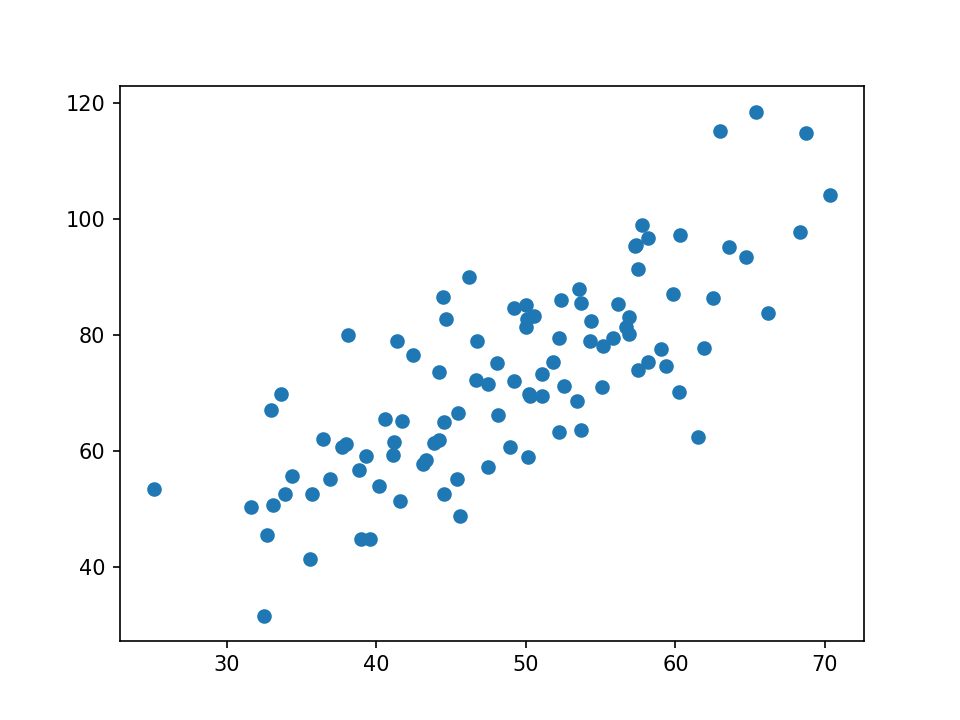

In [2]:
data = np.genfromtxt('data.csv',delimiter=',')
x_data = data[:,0]
y_data = data[:,1]

plt.scatter(x_data, y_data)

In [3]:
# centralize the data set
def zeroMean(dataset):
    '''
    Parameters:
        dataset: data set
    
    Return:
        new_data: the data set after centralization
        mean_val: the mean of each col, used for reconstructing data
    '''
    data_mat = np.mat(dataset)
    mean_val = np.mean(data_mat, axis = 0) 
    new_data = data_mat - mean_val
    return new_data, mean_val

In [4]:
def pca(dataset, k, recon = False):
    '''
    Instructure: reduce the dimensions of data set
    
    Parameters:
        dataset: the dataset
        k: the number of dimensions of the dataset after operation
        recon: if there will reconstrute the data
        
    Return:
        low_data: a new dataset with the dimension k
        recon_data: the dataset after by reconstructing
        
    '''
    # cnetralize the original dataset
    new_data, mean_val = zeroMean(dataset)
    
    # get the covariance matrix by using np.cov, rowvar=0 means one row is one sample
    cov_mat = np.cov(new_data, rowvar=0)
    
    # get the eigenvalues and eignevectors
    eig_vals, eig_vects = np.linalg.eig(np.mat(cov_mat))
    
    # sort the eigenvalues from smallest to highest and get the index
    eigval_Indice = np.argsort(eig_vals)
    
    # get the top k eigval index
    k_eigval_Indice = eigval_Indice[-1: -(k + 1): -1]
    
    # get the corresponding eigenvectors
    k_eigvect = eig_vects[:,k_eigval_Indice]
    
    # get the lower dimension data
    low_data = new_data * k_eigvect
    
    if recon:
        # reconstructe the data
        recon_data = np.array((low_data * k_eigvect.T) + mean_val)
        return low_data, recon_data

    else:
        return low_data

In [5]:
low_data, recon_data = pca(data, k = 1, recon=True)

<IPython.core.display.Javascript object>


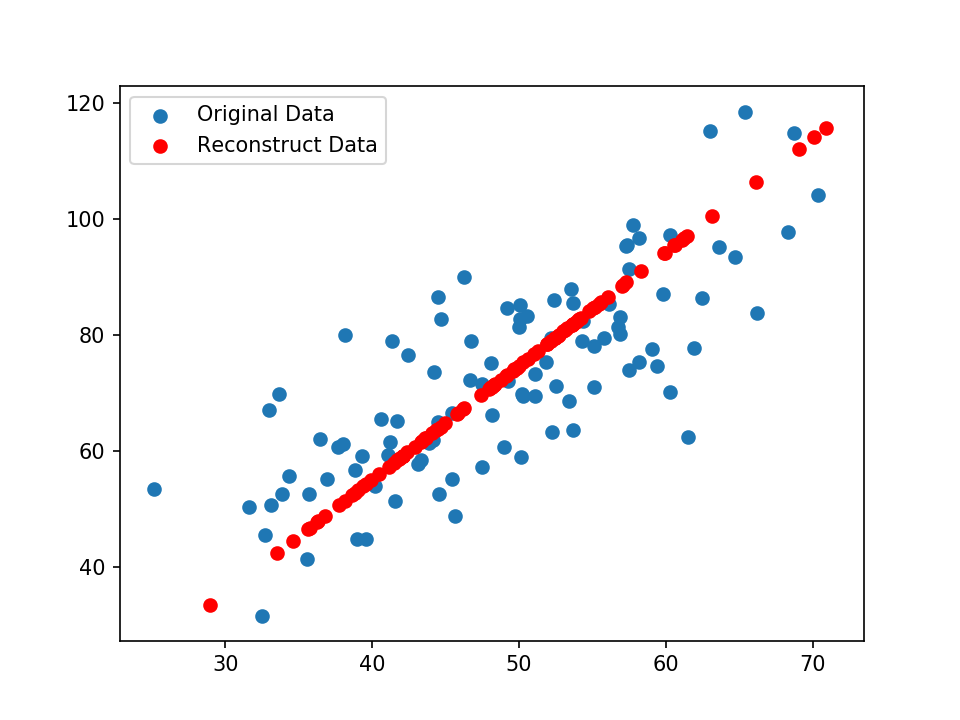

In [6]:
plt.scatter(x_data, y_data, label = 'Original Data')

plt.scatter(recon_data[:, 0], recon_data[:, 1],c = 'r', label = 'Reconstruct Data')

plt.legend(loc = 'best')